In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
x = np.arange(0, 10, 0.5)
y = np.arange(0, 10, 0.5)
np.random.shuffle(x)
np.random.shuffle(y)

In [19]:
x, y

(array([8. , 1. , 0. , 4.5, 7. , 4. , 2. , 9.5, 2.5, 1.5, 5.5, 7.5, 8.5,
        3.5, 6.5, 0.5, 5. , 6. , 9. , 3. ]),
 array([1.5, 5. , 9.5, 0.5, 7.5, 7. , 9. , 6. , 1. , 6.5, 4. , 8. , 3.5,
        4.5, 3. , 8.5, 0. , 2. , 5.5, 2.5]))

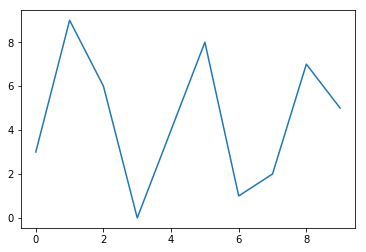

In [8]:
plt.plot(y) ;

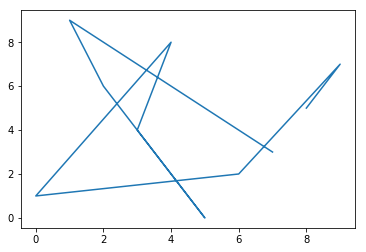

In [9]:
plt.plot(x, y)

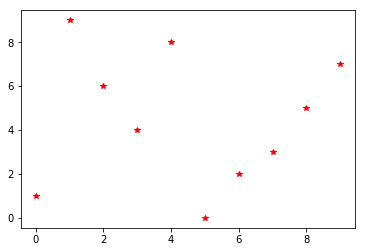

In [10]:
plt.plot(x, y, 'r*')

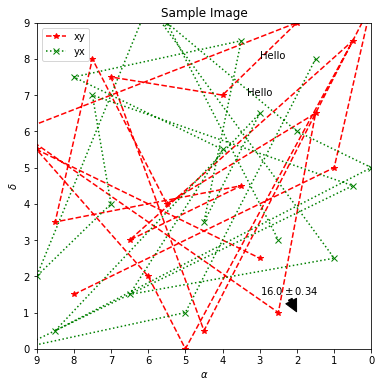

In [23]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(x, y, 'r*--', label='xy')
ax.plot(y, x, 'gx:',  label='yx')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\delta$')
ax.set_xlim(9, 0)
ax.set_ylim(0, 9)
ax.set_title('Sample Image')
ax.legend()
ax.text(3, 8, 'Hello')
ax.text(3, 7, 'Hello', ha='center')
# ax.set_yscale('log')
ax.annotate('$16.0\\pm0.34$', xy=(2, 1), xytext=(3, 1.5), 
            arrowprops=dict(facecolor='black', shrink=0.05), )
fig.savefig('sample1.eps')
fig.savefig('sample1.png')
# plt.close(fig)

In [24]:
cata = fits.getdata('sample.cata.fits', 2)

In [26]:
cata.shape, cata.dtype

((392,),
 dtype((numpy.record, [('NUMBER', '>i4'), ('X_IMAGE_DBL', '>f8'), ('Y_IMAGE_DBL', '>f8'), ('XWIN_IMAGE', '>f8'), ('YWIN_IMAGE', '>f8'), ('ELONGATION', '>f4'), ('FWHM_IMAGE', '>f4'), ('A_IMAGE', '>f4'), ('B_IMAGE', '>f4'), ('THETA_IMAGE', '>f4'), ('AWIN_IMAGE', '>f4'), ('BWIN_IMAGE', '>f4'), ('THETAWIN_IMAGE', '>f4'), ('ERRAWIN_IMAGE', '>f4'), ('ERRBWIN_IMAGE', '>f4'), ('ERRTHETAWIN_IMAGE', '>f4'), ('FLUX_AUTO', '>f4'), ('FLUXERR_AUTO', '>f4'), ('MAG_AUTO', '>f4'), ('MAGERR_AUTO', '>f4'), ('MAG_BEST', '>f4'), ('MAGERR_BEST', '>f4'), ('MAG_ISOCOR', '>f4'), ('MAGERR_ISOCOR', '>f4'), ('MAG_PETRO', '>f4'), ('MAGERR_PETRO', '>f4'), ('BACKGROUND', '>f4'), ('KRON_RADIUS', '>f4'), ('FLUX_RADIUS', '>f4'), ('FLAGS', '>i2'), ('ALPHA_J2000', '>f8'), ('DELTA_J2000', '>f8')])))

(array([32., 20., 22., 18., 22., 18., 14., 16., 18., 18., 23., 18., 21.,
        13., 17., 19., 22., 15., 22., 14.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000.]),
 <a list of 20 Patch objects>)

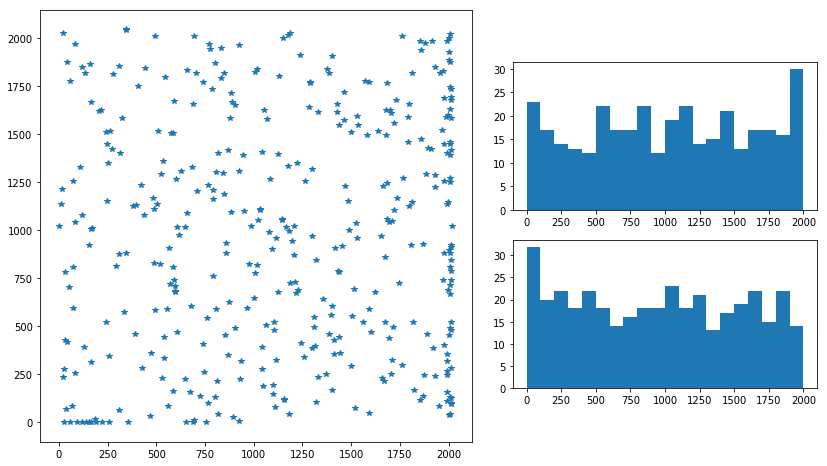

In [30]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(1, 2, 1)  #121
ax = fig.add_subplot(111, position=(0, 0, 0.5, 1))
ax.plot(cata['X_IMAGE_DBL'], cata['Y_IMAGE_DBL'], '*')

ax_x = fig.add_subplot(2, 2, 2)
ax_x.hist(cata['X_IMAGE_DBL'], range=(0, 2000), bins=20)
ax_y = fig.add_subplot(2, 2, 4)
ax_y.hist(cata['Y_IMAGE_DBL'], range=(0, 2000), bins=20)

In [31]:
img = fits.getdata('sample.fits')

In [35]:
img_med = np.median(img)
img_std = np.std(img)

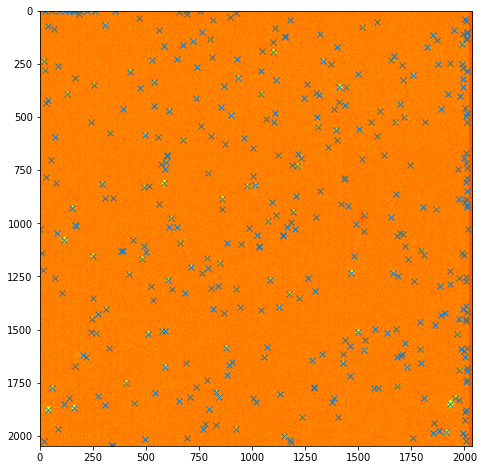

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(img, 
          vmax=img_med + 0.5 * img_std, 
          vmin=img_med - 0.5 * img_std, 
          cmap='autumn')
ax.plot(cata['X_IMAGE_DBL'], cata['Y_IMAGE_DBL'], 'x')